# Project: Wrangle Act 

### Table of Contents

* Introduction
* Data Gathering
* Data Assessment
* Data Cleaning
* Storing Data
* Analyzing & Visualizing Data
* Conclusions

### Introduction

#### Dataset Description

WeRateDogs is a twitter account which share dog images and write a brief panegyric about the dog, then they let their followers to rate it by favoriting it. By asking WeRateDogs to share with us some of their tweets, they did. They have shared 5000+ of their tweets which contains some basic data. Sometimes in their brief panegyric they mention the breed of the dog, and some others they don’t. But thanks to Udacity, they have performed some neutral network procedures to classify the dogs based on their images which are shared with the tweets.

#### Objectives

We are required to gather our data from three different datasets from different sources. After gathering, we will assess the gathered data for quality and tidiness issues and then go on to clean them as and make some deductions insights from the cleaned data. We will also keep a copy of the cleaned data for later and further uses.

#### Import Needed packages

In [97]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
import requests
import json
import os
import re
import warnings
warnings.simplefilter('ignore')
%matplotlib inline
plt.show()

# These imports are needed to access twitter api
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer

## Gathering Data

Here we gathered the data from the three different data sources.

### Gathering First Dataset : Tweet Archive

The first dataset is already provided to us as a csv file named "twitter_archive_enhanced.csv". We only need to load this dataset into our dataframe.

In [98]:
# Load Dataset
tweet_archive = pd.read_csv('twitter-archive-enhanced.csv')

# Print out few lines to do visual assessment
tweet_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
# Check the number of rows and colums
tweet_archive.shape

(2356, 17)

### Observation:

The dataset has 2356 rows and 17 columns

### Gathering Second Dataset: Tweet Count

We programmatically download the other tweet info from the Twitter api and write them to a file named "tweet_json.csv"

The cell below is used to download the data from the Twitter API

In [99]:
# Needed packages have already been imported at the "packages import cell" earlier

consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = tweet_archive.tweet_id.values
len(tweet_ids)

2356

The code in the cell below is provided by Udacity, however, we don't need to run it since our dataset has been downloaded from above.

In [100]:
# set a function for tweet extraction
# file already created so no need to execute to continue the notebook
def tweet_extraction():
    count = 0
    fails_dict = {}
    start = timer()
    with open('tweet_json.txt', 'w') as outfile:
        for tweet_id in tweet_ids:
            count += 1
            print(str(count) + ": " + str(tweet_id))
            try:
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                print("Success")
                json.dump(tweet._json, outfile)
                outfile.write('\n')
            except tweepy.TweepError as e:
                print("Fail")
                fails_dict[tweet_id] = e
                pass
    end = timer()
    print(end - start)
    print(fails_dict)

Write the "tweet_json.csv" file lines into a dataframe

In [101]:
tweet_count_list = []
with open('tweet_json.txt') as file:
    for line in file:
        data = json.loads(line)
        keys = data.keys()
        user = data.get('user')
        id_str = data.get('id_str')
        retweet_count = data.get('retweet_count')
        favorite_count = data.get('favorite_count')
        tweet_count_list.append({'id_str': id_str,
                        'retweet_count': retweet_count,
                        'favorite_count': favorite_count})

In [102]:
# Load data into dataframe
tweet_count = pd.DataFrame(tweet_count_list, columns = ['id_str', 'retweet_count', 'favorite_count'])

In [103]:
# Show the first five values in the dataframe
tweet_count.head()

,id_str,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Gathering Third Dataset: Image Predictions

The third dataset is downloaded programmatically from the Udacity server and stored in a folder named "image_predictions", we then wrote the folder to our local computer and finally loaded it into a pandas DataFrame.

Let's access the file from the internet

In [9]:
# Downloading the image predictions from the Udacity server (over the internet)
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

Let's write the data content into a file

In [10]:
# Write the content of the downloaded file into a file saved in the designated folder
with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

Let's load the data content from the file into Pandas dataframe

In [11]:
# Load data to dataframe
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

In [12]:
# Show first few lines of the dataframe
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## Assessing Data

* Load data sets into dataframes
* Check the loaded data to do visual assessment.
* Carry out programattic assessment
* Check for columns with empty and null entries.
* Check for entries with wrong or mismatched datatypes
* Check statistic summary of the data
* Check for other quality or tidiness issues.
### Visual Assessment
#### Loading Datasets
    Load and visually assess Tweet Archive data table

In [13]:
tweet_archive.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


Load and visually assess Tweet Count data table

In [14]:
tweet_count.head(10)

,id_str,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


Load and visually assess Image Predictions data table

In [15]:
image_predictions.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


## Observations:

### Tweet_Archive Table

#### Quality Issues

* The columns in_reply_to_status_id and in_reply_to_user_id has many null/empty values
* According to the dog dictionary, the correct name for the column "floofer" is "floof", it needs to be corrected.
* The columns retweeted_status_id and retweeted_status_user_id are having many empty/null values.

#### Tidiness Issue

* The dogs age stages which are the columns doggo, floofer, pupper, and puppo should be under a single column since * they are talking about same categorical type of data about the dogs.

### Tweet_Count table

#### Quality Issue

* The id_str column should be named as tweet_id since it serves the same purpose of the tweet_id in other tables

#### Tidiness Issue

* This Tweet Count data table should be merged with the Tweet Archive data table since the both are related data about the same dogs data.

### Image Predictions Table

### Quality Issue

* Breed names of dogs under columns p1, p2, and p3 are having inconsistent cases, some starting in lowercase while some starting with uppercase.

#### Tidiness Issue

* This Image Prediction data table should be merged with both Tweet Archive and Tweet Count data tables because its content is about same dogs data and contains related data which will make the Tweet Archive and Tweet Count data tables complete and wholesome.

# Programmatic Assessment

## Tweet Archive Data Table

In [104]:
# Check the number of entries columns and rows
tweet_archive.shape

(2356, 17)

In [105]:
# Inspect Data types and check for missing data and empty entries
tweet_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [18]:
# Check for null values/entries
tweet_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [19]:
# Check for duplicated rows
tweet_archive.duplicated().sum()

0

Let's see if we can categorize the sources of the tweets

In [20]:
# Check the number of entries using each source type
tweet_archive["source"].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [21]:
# This just confirms our output number of sources type above
tweet_archive["source"].nunique()

4

In [22]:
rating_numerator_above_15 = tweet_archive.query('rating_numerator > 15').count()
rating_numerator_above_15

tweet_id                      26
in_reply_to_status_id          7
in_reply_to_user_id            7
timestamp                     26
source                        26
text                          26
retweeted_status_id            1
retweeted_status_user_id       1
retweeted_status_timestamp     1
expanded_urls                 20
rating_numerator              26
rating_denominator            26
name                          26
doggo                         26
floofer                       26
pupper                        26
puppo                         26
dtype: int64

In [23]:
rating_denominator_above_10 = tweet_archive.query('rating_denominator > 10').count()
rating_denominator_above_10

tweet_id                      20
in_reply_to_status_id          4
in_reply_to_user_id            4
timestamp                     20
source                        20
text                          20
retweeted_status_id            1
retweeted_status_user_id       1
retweeted_status_timestamp     1
expanded_urls                 17
rating_numerator              20
rating_denominator            20
name                          20
doggo                         20
floofer                       20
pupper                        20
puppo                         20
dtype: int64

# Observations: Tweet Archive Assessment

* There are 2356 rows and 17 columns. This means we have 2356 entries in this table overrall.
* tweet_id datatype is int64 while it's supposed to be a string (shown as object by pandas).
* timestamp datatype is object while it's supposed to be datetime.
* There are 181 rows which are retweeted tweets.
* in_reply_to_status_id columns has too many null values.
* in_reply_to_user_id columns has too many null values.
* retweeted_status_id columns has too many null values.
* retweeted_status_user_id columns has too many null values.
* retweeted_status_timestamp columns has too many null values.
* expanded_urls column has 59 rows with null values
* There are no duplicated rows.
* There are four source types where the tweets come from.
* We need to use a readbale and short name for each of the sources to replace the very long string used in the table.
* Only 26 rows have rating numerator greater than 15
* Only 20 rows have rating denominator greater than 10.

### Tweet Count Data Table

In [24]:
# Check the number of entries columns and rows
tweet_count.shape

(2354, 3)

In [25]:
# Inspect Data types and check for missing data and empty entries
tweet_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id_str            2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


In [26]:
# Check for null values/entries
tweet_count.isnull().sum()

id_str            0
retweet_count     0
favorite_count    0
dtype: int64

In [27]:
# Check for duplicated rows
tweet_count.duplicated().sum()

0

## Observations: Tweet Count Assessment

* There are 2354 rows and 3 columns. This means we have 2356 entries in this table overrall.
* The three columns are with correct data types.
* There are no null values in any of the columns.
* There's no duplicated row

### Image Predictions Data Table

In [28]:
# Check the number of entries columns and rows
image_predictions.shape

(2075, 12)

In [29]:
# Inspect Data types and check for missing data and empty entries
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [30]:
# Check for null values/entries
image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [31]:
# Check for duplicated rows
image_predictions.duplicated().sum()

0

## Observations: Image Predictions Assessment

* There are 2075 rows and 12 columns. This means we have 2075 entries in this table overrall.
* The tweet_id is with int64 datatype while it's supposed to be string.
* There are no null values in any of the columns.
* There's no duplicated row

### Quality Issues

* tweet_id datatype is int64 while it's supposed to be a string (shown as object by pandas).
* timestamp datatype is object while it's supposed to be datetime.
* in_reply_to_status_id columns has too many null values.
* in_reply_to_user_id columns has too many null values.
* There are 181 rows which are retweeted tweets. We are required to remove these rows so as to have only original tweets in the data table
* retweeted_status_id columns has too many null values.
* retweeted_status_user_id columns has too many null values.
* retweeted_status_timestamp columns has too many null values.
* expanded_urls column has 59 rows with null values
* source names are too long and not easily readable
* There are some 26 rows which have rating numerator greater than 15 (only small number of rows have such figures), these may affect result of future quantitative analysis unless we mask the rows in question. However, we are not required to drop the rows for the objective of this project.
* There are some 20 rows that have rating denominator greater than 10 (10 is the major denominator as seen from assessment), these may affect result of future quantitative analysis unless we mask the rows in question. However, we are not required to drop the rows for the objective of this project.
* The id_str column name is supposed to be named as tweet_id since it serves the same purpose of the tweet_id in other tables
* The cases of many breed names of dogs under columns p1, p2, and p3 are inconsistent.
* Change the tweet_id datatype from int64 datatype to string datatype.

### Tidiness Issues

* The dogs age stages which are the columns doggo, floofer, pupper, and puppo should be under a single column since they are talking about same categorical type of data about the dogs.
* The three tables should be merge into a master data table since the remaining two tables are extension of the data in the archive table

## Combined Observations

### Tweet Archive Table

* There are 2356 rows and 17 columns. This means we have 2356 entries in this table overrall.
* tweet_id datatype is int64 while it's supposed to be a string (shown as object by pandas).
* timestamp datatype is object while it's supposed to be datetime.
* in_reply_to_status_id columns has too many null values.
* in_reply_to_user_id columns has too many null values.
* retweeted_status_id columns has too many null values.
* retweeted_status_user_id columns has too many null values.
* retweeted_status_timestamp columns has too many null values.
* expanded_urls column has 59 rows with null values
* There are no duplicated rows.
* There are no duplicated rows.
* There are four source types where the tweets come from.
* We need to use a readbale and short name for each of the sources to replace the very long string used in the table.
* Only 26 rows have rating numerator greater than 15
* Only 20 rows have rating denominator greater than 10.

### Tweet Count Table

* There are 2354 rows and 3 columns. This means we have 2356 entries in this table overrall.
* The three columns are with correct data types.
* There are no null values in any of the columns.
* There's no duplicated row

### Image Predictions Table

* There are 2075 rows and 12 columns. This means we have 2075 entries in this table overrall.
* The tweet_id is with int64 datatype while it's supposed to be string.
* There are no null values in any of the columns.
* There's no duplicated row

# Cleaning Data

### Tweet Archive

* Make a copy of the original data set before cleaning so as to have the raw data intact.
* Drop the 181 rows which are retweeted tweets.
* Drop these columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp (has many null/empty values and are not necessary columns for our dataset and analysis project objective)
* Rename the column name "floofer" as "floof".
* Change the timestamp datatype to datetime.
* Change the tweet_id datatype to string instead of int64 data-type
* Replace "floofer" with "floof" under floof column.
* Under the age_stage individual columns (floof, doggo, etc.) Replace "None" with empty space "".
* Check for rows which has values of more than one with respect to the age_stage and remove such rows since it will be confusing for a dog to belong to more than one age group at the same time.
* Then create a new column called "age-stage" and combine all the flooper, doggo etc., columns into it. Then remove the individual columns of flooper, doggo, ect.
* Replace the four unique source names with shorter and readable names.

### Tweet Count

* Make a copy of the original data set before cleaning so as to have the raw data intact.
* Rename id_str column as tweet_id since it serves the same purpose of the tweet_id in other tables

### Image Predictions

* Make a copy of the original data set before cleaning so as to have the raw data intact.
* Change the cases of all breed names of dogs under columns p1, p2, and p3 to lowercase.
* Change the tweet_id datatype from int64 datatype to string datatype.

### Master Data Table

* Save a copy of each cleaned data table so as to keep a copy of the original data sets intact.
* Merge the three tables into a msater data table.
* Save a copy of the cleaned master data table to a file named "twitter_archive_master.csv"
 
## Tweet Archive

### Make a copy of the original data set before cleaning so as to have the raw data intact.

In [204]:
archive_clean = tweet_archive.copy()
archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


# Drop the 181 rows which are retweeted tweets.

### Define

Drop the 181 rows which are retweeted tweets.

### Code

In [208]:
# Try to check the numbers of the non-null retweeted tweets rows 
archive_clean['retweeted_status_id'].notnull().sum()

181

In [207]:
# Drop all the retweeted tweets rows

archive_clean.drop(archive_clean.query['retweeted_status_id'].notnull().index, inplace=True)

TypeError: 'method' object is not subscriptable

### Test

In [206]:
# Confirm the retweeted tweets are dropped

archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

# Remove unnnecessary columns with null values

## Define

Drop these columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp (has many null/empty values and are not necessary columns for our dataset and analysis project objective)

## Code

In [85]:
archive_clean.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'retweeted_status_id'], axis=1, inplace=True)

## Test

In [86]:
archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


## Rename the column name "floofer" as "floof".

### Define

Rename the column name "floofer" as "floof".

### Code

In [117]:
archive_clean.rename(columns={"floofer" : "floof"}, inplace=True);

### Test

In [118]:
list(archive_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floof',
 'pupper',
 'puppo']

##  Replace "floofer" with "floof" under floof column.

## Define

Replace "floofer" with "floof" under floof column.

## Code

In [119]:
archive_clean["floof"].replace("floofer", "floof", inplace=True)

## Test

In [120]:
# This confirms that "floofer" has been replaced with "floof" in all entries/rows
archive_clean["floof"].value_counts()

None     2346
floof      10
Name: floof, dtype: int64

## Change the timestamp datatype to datetime.

### Define

Change the timestamp datatype to datetime.

### Code

In [121]:
archive_clean['timestamp'] = pd.to_datetime(archive_clean.timestamp)

### Test

In [122]:
archive_clean.timestamp.dtype

dtype('<M8[ns]')

## Change the tweet_id datatype to string instead of int64 data-type

### Define

Change the tweet_id datatype to string instead of int64 data-type

### Code

In [123]:
archive_clean["tweet_id"] = archive_clean.tweet_id.astype("str")

#Test

In [124]:
archive_clean.tweet_id.dtype

dtype('O')

## Under the columns (floof, doggo, pupper, puppo) Replace "None" with empty space "".

###Define

Under the columns (floof, doggo, pupper, puppo) Replace "None" with empty space "".

### Code

In [128]:
#Check the unique values under floof column to be sure we don't have 
#values that are different from our known values (None and floofer)

archive_clean.floof.value_counts()

None     2346
floof      10
Name: floof, dtype: int64

In [129]:
# Replace "None" with empty space ""

archive_clean.floof.replace("None", "", inplace=True)

In [130]:
#Check the unique values under doggo column to be sure we don't have 
#values that are different from our known values (None and doggo)

archive_clean.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [131]:
# Replace "None" with empty space ""

archive_clean.doggo.replace("None", "", inplace=True)

In [132]:
#Check the unique values under pupper column to be sure we don't have 
#values that are different from our known values (None and pupper)

archive_clean.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [133]:
# Replace "None" with empty space ""

archive_clean.pupper.replace("None", "", inplace=True)

In [134]:
#Check the unique values under puppo column to be sure we don't have 
#values that are different from our known values (None and puppo)

archive_clean.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [135]:
# Replace "None" with empty space ""

archive_clean.puppo.replace("None", "", inplace=True)

### Test

In [136]:
## Confirm replacement for floof
archive_clean.floof.value_counts()

         2346
floof      10
Name: floof, dtype: int64

In [137]:
## Confirm replacement for doggo
archive_clean.doggo.value_counts()

         2259
doggo      97
Name: doggo, dtype: int64

In [138]:
## Confirm replacement for pupper
archive_clean.pupper.value_counts()

          2099
pupper     257
Name: pupper, dtype: int64

In [139]:
## Confirm replacement for puppo
archive_clean.puppo.value_counts()

         2326
puppo      30
Name: puppo, dtype: int64

In [140]:
# Check the table to confirm visually. You should run this code cell multiple times (three times)
# so as to check the output of random rows multiple times.

archive_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floof,pupper,puppo
654,791821351946420224,NaN,NaN,2016-10-28 01:58:16,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This little fella really hates ...,6.848310e+17,4.196984e+09,2016-01-06 20:16:44 +0000,"https://vine.co/v/eEZXZI1rqxX,https://vine.co/...",13,10,None,,,pupper,
1345,704491224099647488,7.044857e+17,28785486.0,2016-03-01 02:19:31,"<a href=""http://twitter.com/download/iphone"" r...",13/10 hero af\n@ABC,NaN,NaN,NaN,NaN,13,10,None,,,,
337,832397543355072512,NaN,NaN,2017-02-17 01:13:34,"<a href=""http://twitter.com/download/iphone"" r...",This is Eevee. She wants to see how you're doi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/832397543...,12,10,Eevee,,,,
2008,672256522047614977,NaN,NaN,2015-12-03 03:30:19,"<a href=""http://twitter.com/download/iphone"" r...",Mighty rare dogs here. Long smooth necks. Grea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672256522...,8,10,None,,,,
2123,670385711116361728,NaN,NaN,2015-11-27 23:36:23,"<a href=""http://twitter.com/download/iphone"" r...",Meet Larry. He's a Panoramic Benzoate. Can sho...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670385711...,8,10,Larry,,,,


## Check for rows which has values of more than one with respect to the age_stage and remove such rows since it will be confusing for a dog to belong to more than one age group at the same time.

### Define

Check for rows which has values of more than one with respect to the age_stage and remove such rows since it will be confusing for a dog to belong to more than one age group at the same time.

### Code

In [141]:
# Create a new column named "age_stage"
# Merge the floof, doggo, pupper and puppo columns into the age_stage column

archive_clean["age_stage"] = archive_clean.floof + archive_clean.doggo + archive_clean.pupper + archive_clean.puppo

In [142]:
# Drop the floof, doggo, pupper and puppo columns

archive_clean.drop(columns={"floof", "doggo", "pupper", "puppo"}, inplace=True)

In [143]:
# Replace empty values in age_stage with "undefined"

archive_clean.age_stage.replace("", "undefined", inplace=True)

In [144]:
# Check the number of unique values of age_stage. 
# Ideally we should get "4" unless there are rows which have more than one age_stage

archive_clean.age_stage.nunique()

8

In [145]:
# Check for rows which have more than age_stage combined

archive_clean.age_stage.value_counts()

undefined      1976
pupper          245
doggo            83
puppo            29
doggopupper      12
floof             9
floofdoggo        1
doggopuppo        1
Name: age_stage, dtype: int64

In [146]:
# Drop the rows which have "doggopupper", "doggopuppo" and "floofdoggo"

archive_clean.drop(archive_clean.query("age_stage == 'doggopupper'").index, inplace=True)

archive_clean.drop(archive_clean.query("age_stage == 'doggopuppo'").index, inplace=True)

archive_clean.drop(archive_clean.query("age_stage == 'floofdoggo'").index, inplace=True)

### Test

In [147]:
# Check to confirm if the columns mantioned above are dropped

list(archive_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'age_stage']

In [148]:
# Check to confirm if the rows mantioned above are dropped

archive_clean.age_stage.value_counts()

undefined    1976
pupper        245
doggo          83
puppo          29
floof           9
Name: age_stage, dtype: int64

# Replace the four unique source names with shorter and readable names.

### Define

Replace the four unique source names with shorter and readable names.

### Code


In [149]:
# Check the source names

archive_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2208
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          90
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [150]:
# Replace long source names

archive_clean.source.replace('Twitter for iPhone', 'iPhone', inplace=True)
archive_clean.source.replace('Vine - Make a Scene', 'Vine', inplace=True)
archive_clean.source.replace('Twitter Web Client', 'Web', inplace=True)
archive_clean.source.replace('TweetDeck', 'TweetDeck', inplace=True)

### Test

In [151]:
# Check the updated source names

archive_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2208
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          90
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

# Tweet Count

## Make a copy of the original data set before cleaning so as to have the raw data intact.

In [152]:
count_clean = tweet_count.copy()
count_clean

,id_str,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


## Rename id_str column as tweet_id since it serves the same purpose of the tweet_id in other tables

## Define

Rename id_str column as tweet_id since it serves the same purpose of the tweet_id in other tables

## Code

In [153]:
# rename id_str as tweet_id

count_clean.rename(columns={"id_str":"tweet_id"}, inplace=True)

## Test

In [154]:
# Confirm if the column name has been renamed

list(count_clean)

['tweet_id', 'retweet_count', 'favorite_count']

# Image Predictions

## Make a copy of the original data set before cleaning so as to have the raw data intact.

In [155]:
images_clean = image_predictions.copy()

images_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


# Change the cases of all breed names of dogs under columns p1, p2, and p3 to lowercase.

## Define

Change the cases of all breed names of dogs under columns p1, p2, and p3 to lowercase.

## Code

In [156]:
images_clean["p1"] = images_clean["p1"].str.lower()
images_clean["p2"] = images_clean["p2"].str.lower()
images_clean["p3"] = images_clean["p3"].str.lower()

### Test

In [157]:
# Check if values in p1, p2 and p3 have been converted to lowercase

images_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


# Change the tweet_id datatype from int64 datatype to string datatype.

## Define

Change the tweet_id datatype from int64 datatype to string datatype.

## Code

In [158]:
# Convert tweet_id datatype to string

images_clean.tweet_id = images_clean.tweet_id.astype('str')

### Test

In [159]:
images_clean.tweet_id.dtype

dtype('O')

# Master Data Table

## Save a copy of each cleaned data table so as to keep a copy of the original data sets intact.

In [160]:
archive_clean.to_csv('twitter_archive_clean.csv', index=False)

count_clean.to_csv('tweet_count_cleaned.csv', index=False)

images_clean.to_csv('image_predictions_clean.csv', index=False)

# Merge the three tables into a msater data table.

## Define

Merge the three tables into a msater data table

## Code

In [162]:
# The three tables are merged into one master table

master_table = pd.merge(pd.merge(archive_clean, count_clean,on='tweet_id'),images_clean,on='tweet_id')

## Test

In [163]:
# To confirm the columns in the three tables are present in the master table

master_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2060 entries, 0 to 2059
Data columns (total 27 columns):
tweet_id                      2060 non-null object
in_reply_to_status_id         22 non-null float64
in_reply_to_user_id           22 non-null float64
timestamp                     2060 non-null datetime64[ns]
source                        2060 non-null object
text                          2060 non-null object
retweeted_status_id           77 non-null float64
retweeted_status_user_id      77 non-null float64
retweeted_status_timestamp    77 non-null object
expanded_urls                 2060 non-null object
rating_numerator              2060 non-null int64
rating_denominator            2060 non-null int64
name                          2060 non-null object
age_stage                     2060 non-null object
retweet_count                 2060 non-null int64
favorite_count                2060 non-null int64
jpg_url                       2060 non-null object
img_num                     

In [164]:
# To check visually again that the master table contains all columns of the three merged tables

master_table.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True


# Storing Data

## Save a copy of the cleaned master data table to a file named "twitter_archive_master.csv"

## Define

Save a copy of the cleaned master data table to a file named "twitter_archive_master.csv"

## Code

In [165]:
master_table.to_csv('twitter_archive_master.csv', index=False)

## Test

In [166]:
# Read the saved master table and load to dataframe to confirm the saved copy is truly saved
# and to be sure the content in it are what we expected.

twitter_archive_master = pd.read_csv('twitter_archive_master.csv')
twitter_archive_master.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True


# Store/save a copy of the individual cleaned datasets

In [167]:
# Save cleaned archive data
archive_clean.to_csv('tweet_archive_clean.csv', index=True)

#Save cleaned tweet count data
count_clean.to_csv('tweet_count_clean.csv', index=True)

# Save cleaned image predictions data
images_clean.to_csv('image_predictions_clean.csv', index=True)

# Analyzing & Visualizing Data

## Analysis Questions

1. What are the five most popular dog breeds (breeds that appear more than others in the table?
2. Which dog breed has the highest retweet count?
3. What's the frequency distribution of the favorite count?
4. Is there a correlation between retweet count and favourite count?
5. What relational information can we get from the comparision of the dog age stages?
6. What dog's name is most popular (a name that appears more than others in the table)?

# 1. What are the five most popular dog breeds (breeds that appear more than others in the table?

In [168]:
# Getting the 5 most popular breeds of dog

top_breeds_name = master_table['p1'].value_counts()[:5].index.tolist()
top_breeds_name

['golden_retriever', 'labrador_retriever', 'pembroke', 'chihuahua', 'pug']

In [169]:
master_table.query("p1 == 'golden_retriever'").count()['tweet_id']

144

In [170]:
master_table.query("p1 == 'labrador_retriever'").count()['tweet_id']

99

In [171]:
master_table.query("p1 == 'pembroke'").count()['tweet_id']

88

In [172]:
master_table.query("p1 == 'chihuahua'").count()['tweet_id']

83

In [173]:
master_table.query("p1 == 'pug'").count()['tweet_id']

57

In [174]:
top_breeds_count = master_table['p1'].value_counts()[:5].tolist()
top_breeds_count

[144, 99, 88, 83, 57]

# Comment

* The five most popular breeds of dog in our dataset are golden_retriever, labrador_retriever, pembroke, chihuahua, and pug.
* golden_retriever appeared 144 times and it's the most popular dog breed with the highest occurence in the data set
* labrador_retriever appeared 99 times
* pembroke appeared 88 times
* chihuahua appeared 83 times
* pug appeared 57 times

# 2. Which dog breed has the highest retweet count?

In [175]:
master_table.retweet_count.describe().round(5)

count     2060.00000
mean      2955.78252
std       5037.20065
min         16.00000
25%        630.50000
50%       1399.50000
75%       3440.75000
max      79515.00000
Name: retweet_count, dtype: float64

## Observation

The highest retweet_count = 79515

In [176]:
master_table.query('retweet_count == 79515').p1.value_counts().index

Index(['labrador_retriever'], dtype='object')

# Comment

Labrador Retriever breed has the highest retweet count

# 3. What's the frequency distribution of the favorite count?

In [177]:
master_table.favorite_count.describe()

count      2060.000000
mean       8524.400971
std       12074.540625
min           0.000000
25%        1670.250000
50%        3842.500000
75%       10913.000000
max      132810.000000
Name: favorite_count, dtype: float64

(array([  1.64200000e+03,   2.72000000e+02,   1.02000000e+02,
          1.90000000e+01,   9.00000000e+00,   9.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   3.00000000e+00,
          2.00000000e+00]),
 array([      0.,   13281.,   26562.,   39843.,   53124.,   66405.,
          79686.,   92967.,  106248.,  119529.,  132810.]),
 <a list of 10 Patch objects>)

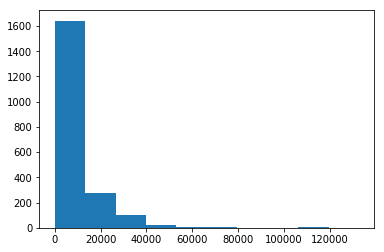

In [178]:
# Plotting an instogram

plt.hist(data = master_table, x='favorite_count')

In [179]:
# Transform the describe() to a scale of log10
# Documentation: [numpy `log10`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.log10.html)

np.log10(master_table.favorite_count.describe())

count    3.313867
mean     3.930664
std      4.081871
min          -inf
25%      3.222781
50%      3.584614
75%      4.037944
max      5.123231
Name: favorite_count, dtype: float64

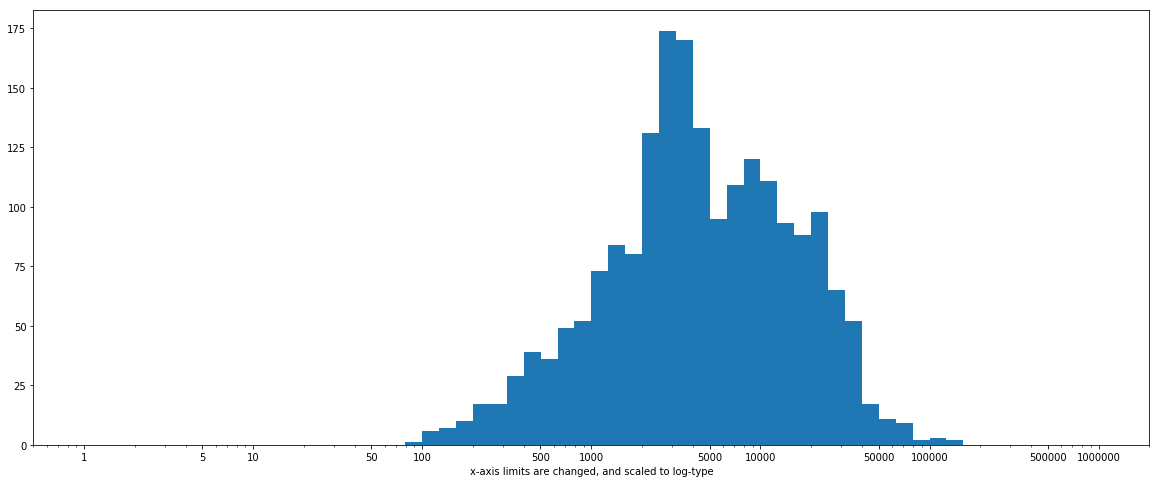

In [180]:
# Axis transformation
# Bin size

plt.figure(figsize = [20,8])

bins = 10 ** np.arange(0, 6+0.1, 0.1)

# Generate the x-ticks you want to apply
ticks = [1, 5, 10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000, 500000, 1000000 ]

# Convert ticks into string values, to be displaye along the x-axis
labels = ['{}'.format(v) for v in ticks]

plt.hist(data=master_table, x='favorite_count', bins=bins);

# The argument in the xscale() represents the axis scale type to apply.
# The possible values are: {"linear", "log", "symlog", "logit", ...}
plt.xscale('log')

# Apply x-axis label
# Documentatin: [matplotlib `xlabel`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xlabel.html))
plt.xlabel('x-axis limits are changed, and scaled to log-type');

# Apply x-ticks
plt.xticks(ticks, labels);

# Comment

* The original data for favorite count is right-skewed (positively skewed).
* We use logarithmic transformation along the x-axis to normalized distribution.

# 4. Is there a correlation between retweet count and favorite count?

In [181]:
# Calculate the correlation coefficient

correlation = master_table.retweet_count.corr(master_table.favorite_count)
correlation

0.7914607598522142

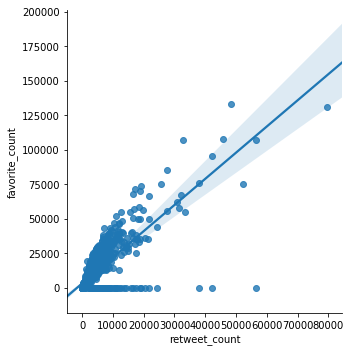

In [187]:
ax = sns.lmplot(x="retweet_count", y="favorite_count", data=master_table)


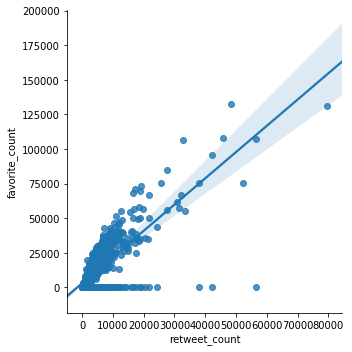

In [188]:
sns.lmplot(x="retweet_count", y="favorite_count", data=master_table);

# Comment

* r (correlation coefficient) = 0.7908904272414722
* A positive correlation coefficient that's very close to +1 denotes that there's a positive and strong correlation between retweet_count and favorite_count. This should be obvious since a tweet that's favorited by many people has the high posibility of been retweeted.

# 5. What relational information can we get from the comparision of the dog age stages?

In [189]:
# Getting the number of dogs belonging to each age stage

master_table.age_stage.value_counts()

undefined    1753
pupper        210
doggo          67
puppo          23
floof           7
Name: age_stage, dtype: int64

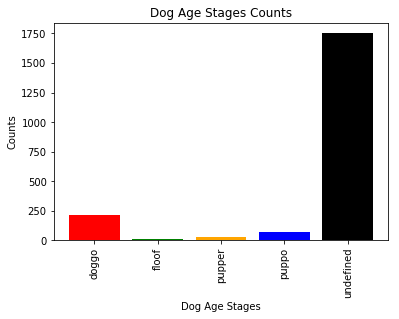

In [190]:
# This is a catgorical data, so Bar chart will be a suitable chart
# Plotting a Bar chart

x = master_table['age_stage'].unique()
y = master_table['age_stage'].value_counts()
color=['black', 'red', 'blue', 'orange', 'green']
plt.bar(x, height= y, color = color)
plt.xticks(rotation=90)
plt.xlabel('Dog Age Stages')
plt.ylabel('Counts')
plt.title("Dog Age Stages Counts");

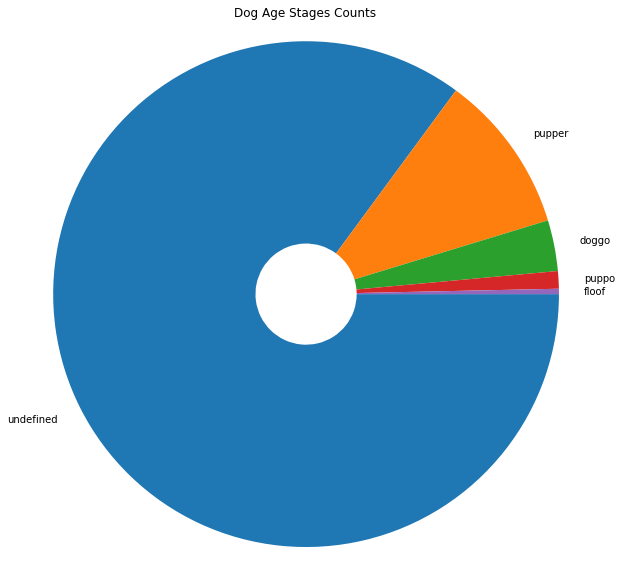

In [191]:
#Plotting a Pie chart

age_stage_counts = master_table.age_stage.value_counts()
labels = master_table.age_stage.value_counts().index

plt_1 = plt.figure(figsize=(10,10))
plt.pie(age_stage_counts, labels = labels, startangle =0, counterclock = False, wedgeprops = {'width' : 0.8});
plt.axis('equal');
plt.title("Dog Age Stages Counts");

# Comment

* Many of the dog rows have undefined dog age stage.
* Among the defined age stages, pupper has the highest number of occurence, hence it's the age stage of most of the dogs. The sum of the other age stage counts is less than the doggo count.

# 6. What dog's name is most popular (a name that appears more than others in the table)?

In [193]:
# Getting the 5 most popular dog names

top_dog_names = master_table['name'].value_counts()[:5].index.tolist()
top_dog_names

['None', 'a', 'Charlie', 'Cooper', 'Oliver']

In [194]:
top_dog_names_count = master_table['name'].value_counts()[:5].tolist()
top_dog_names_count

[570, 55, 11, 10, 10]

In [195]:
master_table.query("name == 'Charlie'").count()['tweet_id']

11

# Comment

* 556 dogs name's rows has no specified name. Their names are missing
* 54 rows have names as "a". This must be a mistake from the data extraction. A dog acn not bear a name "a".
* From our result and observations above, we can say the most popular dog name in the data set is "Charlie", since it's the normal possible dog name with the highest amount of occurence (which is 11, as seen from the list above)

## Conclusions

The analysis project objective is to gathered data from three different sources, assessed, cleaned and merged the three cleaned datasets into a master data table. Also, made some analysis to get insights and made some visualizations so as to communicate some of our findings.

* The first dataset (tweet_archive) was gathered from importing a csv file which contains the raw data. This csv file is provided to us by Udacity.

* The second dataset (tweet_count) was gathered by querying twitter API and written into a local csv file which is then imported to our dataframe to be used for this analysis project

* The third dataset (image_predictions) was gathered from Udacity server by using the request library to gathered the data over the internet from Udacity server. This is possible because a third-party has already gatthered the image predictions data through a neural network and provided it to Udacity.

I was able to gathered some comments which of which some are listed below:

* The five most popular breeds of dog in our dataset are golden_retriever, labrador_retriever, pembroke, chihuahua, and pug.
* The highest retweet_count = 79515.
* Labrador Retriever breed has the highest retweet count.
* The correlation coefficient (r) between retweet_count and favorite_count is "0.7908904272414722". this positive correlation coefficient that's very close to +1 denotes that there's a positive and strong correlation between retweet_count and favorite_count. This should be obvious since a tweet that's favorited by many people has the high posibility of been retweeted.
* Among the defined age stages, pupper has the highest number of occurence, hence it's the age stage of most of the dogs. The sum of the other age stage counts is less than the doggo count.

### Limitations

* Some columns have too many null values and were dropped.
* Some rows got removed automatically when merging the three datasets. This is because "tweet_id" is set as the axis on which the datasets were merged, and the tweet_count table and image_precitions tables both have lesser number of rows to the twitter_archive table, hence the final merged table ended up with lesser rows than the twitter_archive table.


Below are the website and tools that were used that aided in the investigation of the dataset

* pandas
* matplotlib
* seaborn